In [57]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.optimizers import Adam

In [ ]:
# Load the Trained Model
model = load_model('emotion_recognition_model.keras', compile=False)

# Recompile the Model 
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Test Dataset Path
test_path = 'Testing'

# Prepare 
test_gen = ImageDataGenerator(rescale=1./255)

testing_data = test_gen.flow_from_directory(
    test_path,
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical',
    shuffle=False
)

# Evaluate
final_loss, final_accuracy = model.evaluate(testing_data)
print(f"Test Accuracy: {final_accuracy * 100:.2f}%")
print(f"Test Loss: {final_loss:.4f}")

#  Predictions
predicted_emotions = model.predict(testing_data)
predicted_labels = np.argmax(predicted_emotions, axis=1)
true_labels = testing_data.classes




Found 4031 images belonging to 6 classes.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 126ms/step - accuracy: 0.4652 - loss: 1.3844
Test Accuracy: 51.45%
Test Loss: 1.2840
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 182ms/step


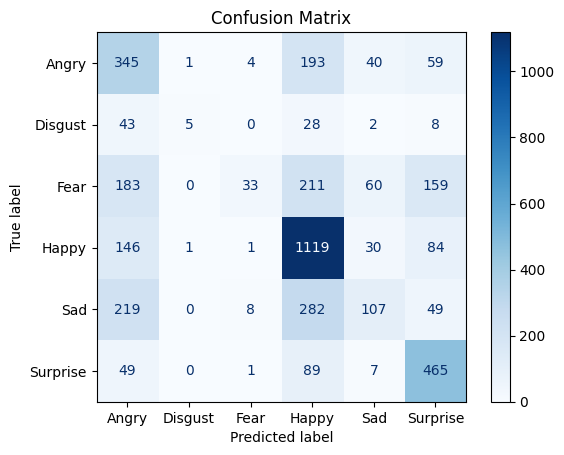

In [59]:
# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=list(testing_data.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [60]:
# Classification Report
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=list(testing_data.class_indices.keys())))


Classification Report:
              precision    recall  f1-score   support

       Angry       0.35      0.54      0.42       642
     Disgust       0.71      0.06      0.11        86
        Fear       0.70      0.05      0.10       646
       Happy       0.58      0.81      0.68      1381
         Sad       0.43      0.16      0.23       665
    Surprise       0.56      0.76      0.65       611

    accuracy                           0.51      4031
   macro avg       0.56      0.40      0.36      4031
weighted avg       0.54      0.51      0.45      4031



In [ ]:
# Display Images with Predicted and True Labels
def display_test_results(test_data, predicted_labels, true_labels, class_names, num_images=9):
    """
    Display a grid of test images with predicted and true labels.
    """
    test_data.reset() 
    images, labels = next(test_data) 

    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].squeeze(), cmap='gray')
        predicted_label = class_names[predicted_labels[i]]
        true_label = class_names[true_labels[i]]
        plt.title(f"Pred: {predicted_label}\nTrue: {true_label}", color="green" if predicted_label == true_label else "red")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

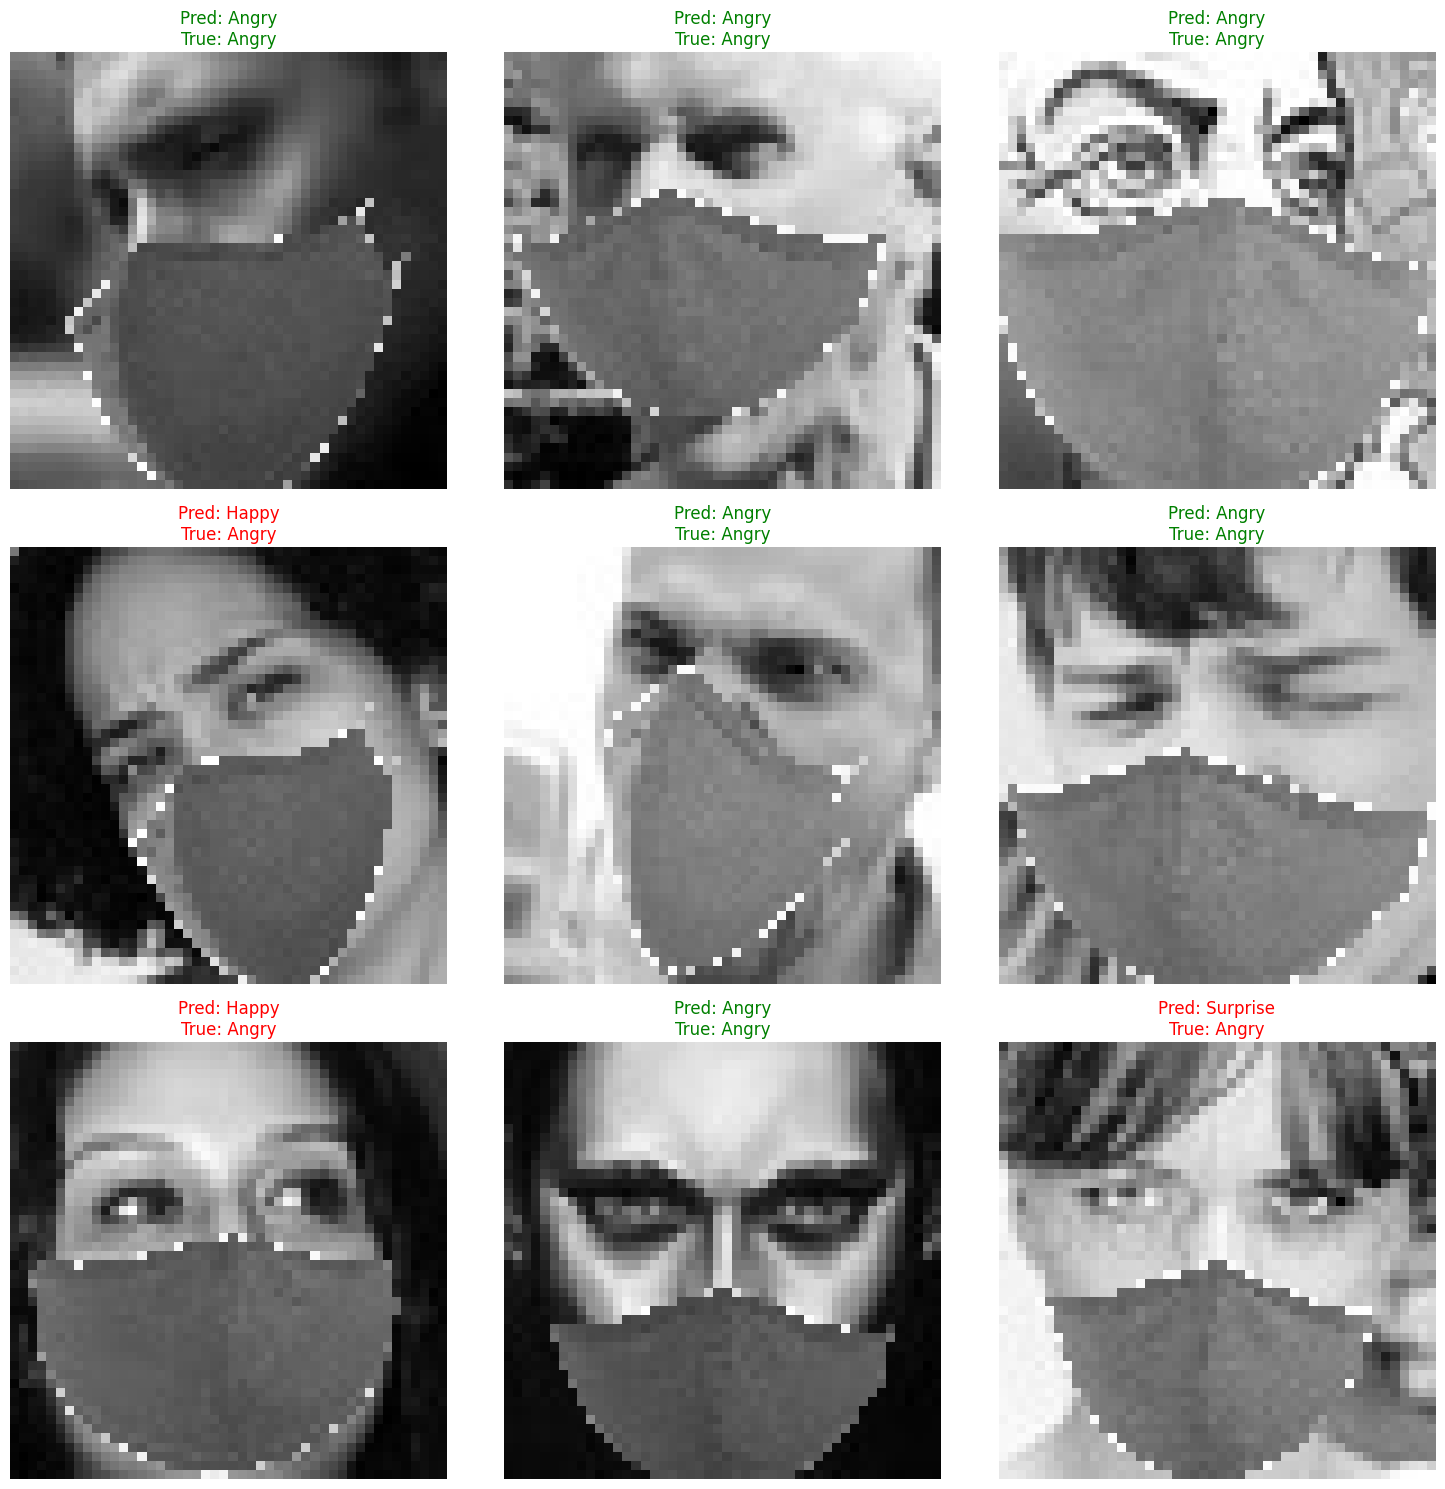

In [ ]:
#  Test Results for First Few Images
display_test_results(
    testing_data, 
    predicted_labels, 
    true_labels, 
    class_names=list(testing_data.class_indices.keys()), 
    num_images=9
)
